## Autistic Spectrum Disorder (ASD) is a neurodevelopment condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. Unfortunately, waiting times for an ASD diagnosis are lengthy and procedures are not cost effective. The economic impact of autism and the increase in the number of ASD cases across the world reveals an urgent need for the development of easily implemented and effective screening methods.

## Classifying autistic patients upon the screening results with Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer

In [2]:
df = pd.read_csv('E:\\Python\\Autism_Data.arff', na_values='?', )

In [5]:
data = df.copy()

In [9]:
data.shape

(704, 21)

In [8]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO


## Dataset contains ten behavioural features (AQ-10-Adult) plus ten individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science.

In [10]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
A1_Score           704 non-null int64
A2_Score           704 non-null int64
A3_Score           704 non-null int64
A4_Score           704 non-null int64
A5_Score           704 non-null int64
A6_Score           704 non-null int64
A7_Score           704 non-null int64
A8_Score           704 non-null int64
A9_Score           704 non-null int64
A10_Score          704 non-null int64
age                702 non-null float64
gender             704 non-null object
ethnicity          609 non-null object
jundice            704 non-null object
austim             704 non-null object
contry_of_res      704 non-null object
used_app_before    704 non-null object
result             704 non-null int64
age_desc           704 non-null object
relation           609 non-null object
Class/ASD          704 non-null object
dtypes: float64(1), int64(11), object(9)
memory usage: 115.6+ KB


In [12]:
data.dtypes.value_counts()

int64      11
object      9
float64     1
dtype: int64

## Dataset has 704 examples and 21 features. 11 of them are ints, 9 are objects and 1 is float.

## MISSING VALUES

In [13]:
total_missing_data = data.isnull().sum().sort_values(ascending=False)

percent_of_missing_data = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)

missing_data = pd.concat(
    [
        total_missing_data, 
        percent_of_missing_data
    ], 
    axis=1, 
    keys=['Total', 'Percent']
)

missing_data.head()

,Total,Percent
ethnicity,95,13.494318
relation,95,13.494318
age,2,0.284091
A9_Score,0,0.000000
A2_Score,0,0.000000


## WHAT IS A "RESULT" COLUMN ?

In [14]:
data.iloc[:, 0:10].sum(axis=1).head(10)

0    6
1    5
2    8
3    6
4    2
5    9
6    2
7    5
8    6
9    8
dtype: int64

## Result Column is a sum of all a*_score columns.

## YES-NO into 0-1

In [15]:
data.columns = map(lambda x: x.strip().lower(), data.columns)

In [16]:
data.rename(columns={'class/asd': 'decision_class'}, inplace=True)

In [17]:
data.jundice = data.jundice.apply(lambda x: 0 if x == 'no' else 1)

In [18]:
data.austim = data.austim.apply(lambda x: 0 if x == 'no' else 1)

In [19]:
data.used_app_before = data.used_app_before.apply(lambda x: 0 if x == 'no' else 1)

In [20]:
data.decision_class = data.decision_class.apply(lambda x: 0 if x == 'NO' else 1)

## GENDER M-F to 0-1

In [21]:
le = LabelEncoder()

data.gender = le.fit_transform(data.gender) 

## WHAT DO WE KNOW ABOUT CATEGORICAL VALUES ?

### STRING VALUES CLEANING

In [22]:
data.contry_of_res = data.contry_of_res.astype('str')
data.contry_of_res = data.contry_of_res.str.lower()
data.contry_of_res = data.contry_of_res.str.replace("'", "")
data.contry_of_res = data.contry_of_res.str.strip()

In [23]:
data.relation = data.relation.replace(np.nan, 'unknown', regex=True)
data.relation = data.relation.astype('str')
data.relation = data.relation.str.lower()
data.relation = data.relation.str.replace("'", "")
data.relation = data.relation.str.strip()

In [24]:
data.ethnicity = data.ethnicity.replace(np.nan, 'unknown', regex=True)
data.ethnicity = data.ethnicity.astype('str')
data.ethnicity = data.ethnicity.str.lower()
data.ethnicity = data.ethnicity.str.replace("'", "")
data.ethnicity = data.ethnicity.str.strip()

## GENDER VS DECISION CLASS

In [25]:
data.gender[data.decision_class == 0].value_counts() # 0-female, 1-male

1    281
0    234
Name: gender, dtype: int64

In [26]:
data.gender[data.decision_class == 1].value_counts() # 0-female, 1-male

0    103
1     86
Name: gender, dtype: int64

## ASD is diagnosed more commonly in females than males.

## ETHNICITY VS DECISSION CLASS

In [27]:
data.ethnicity[data.decision_class == 0].value_counts()

white-european    124
asian             107
unknown            86
middle eastern     84
south asian        33
black              25
others             22
pasifika           11
latino             10
hispanic            8
turkish             5
Name: ethnicity, dtype: int64

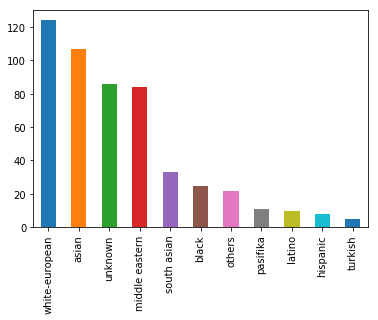

In [28]:
data.ethnicity[data.decision_class == 0].value_counts().plot(kind='bar')

In [29]:
data.ethnicity[data.decision_class == 1].value_counts()

white-european    109
black              18
asian              16
latino             10
unknown             9
others              9
middle eastern      8
hispanic            5
south asian         3
turkish             1
pasifika            1
Name: ethnicity, dtype: int64

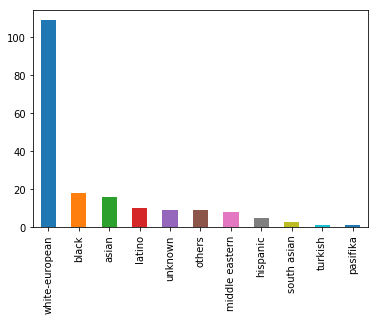

In [30]:
data.ethnicity[data.decision_class == 1].value_counts().plot(kind='bar')

## ASD prevalence is reported to be highest among white-european people.

## RELATION (WHO DID TEST) VS DECISSION CLASS

In [31]:
data.relation[data.decision_class == 0].value_counts()

self                        365
unknown                      86
parent                       38
relative                     19
others                        4
health care professional      3
Name: relation, dtype: int64

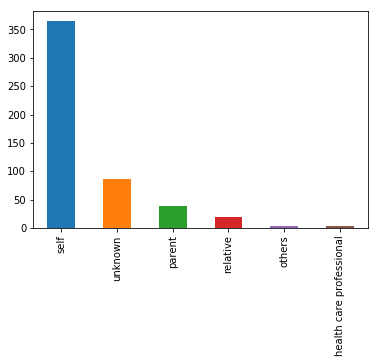

In [32]:
data.relation[data.decision_class == 0].value_counts().plot(kind='bar')

In [33]:
data.relation[data.decision_class == 1].value_counts()

self                        157
parent                       12
relative                      9
unknown                       9
health care professional      1
others                        1
Name: relation, dtype: int64

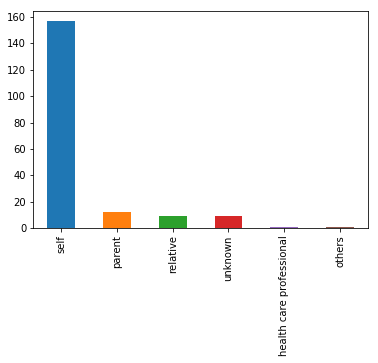

In [35]:
data.relation[data.decision_class == 1].value_counts().plot(kind='bar')

In [36]:
data.contry_of_res[data.decision_class == 0].value_counts().head(10)

united arab emirates    79
india                   75
new zealand             66
united states           60
united kingdom          48
jordan                  45
australia               15
sri lanka               14
afghanistan             11
iran                     7
Name: contry_of_res, dtype: int64

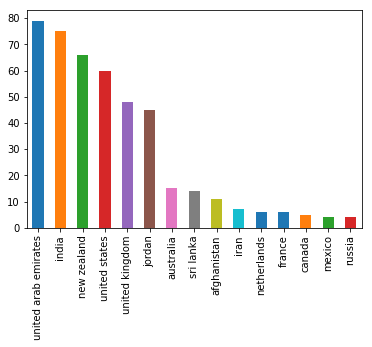

In [37]:
data.contry_of_res[data.decision_class == 0].value_counts().head(15).plot(kind='bar')

In [38]:
data.contry_of_res[data.decision_class == 1].value_counts().head(10)

united states     53
united kingdom    29
new zealand       15
australia         12
canada            10
india              6
france             5
brazil             5
mexico             4
malaysia           4
Name: contry_of_res, dtype: int64

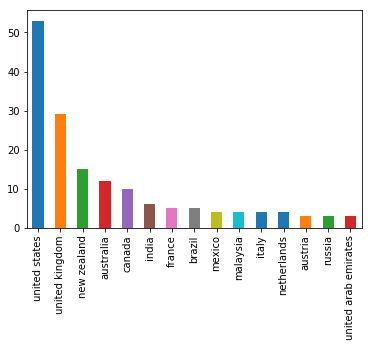

In [39]:
data.contry_of_res[data.decision_class == 1].value_counts().head(15).plot(kind='bar')

## ASD prevalence is reported to be the highest among USA and UK citizens.

## LABEL BINARIZING

## contry_of_res

In [40]:
lb = LabelBinarizer()

lb.fit(data.contry_of_res.values)

binarized_data = lb.transform(data.contry_of_res.values)

binarized_contry_of_res_matrix_data = np.vstack(binarized_data)

In [41]:
binarized_contry_of_res_matrix_data.shape

(704, 67)

## relation

In [42]:
lb = LabelBinarizer()

lb.fit(data.relation.values)

binarized_data = lb.transform(data.relation.values)

binarized_result_matrix_data = np.vstack(binarized_data)

In [43]:
binarized_result_matrix_data.shape

(704, 6)

## ethnicity

In [44]:
lb = LabelBinarizer()

lb.fit(data.ethnicity.values)

binarized_data = lb.transform(data.ethnicity.values)

binarized_ethnicity_matrix_data = np.vstack(binarized_data)

In [45]:
binarized_ethnicity_matrix_data.shape

(704, 11)

In [46]:
data.drop(['age_desc', 'result'], axis=1, inplace=True)

## I'm dropping age_desc and result columns, because there's no such relation between other attributes.

## We can assume age_desc column represents the information whether the patient is an adult or not. Every row has the same value - "18 and more", so in our situation its redundant.

## Also, result column is a sum of all a*_score columns.

In [47]:
data.head()

,a1_score,a2_score,a3_score,a4_score,a5_score,a6_score,a7_score,a8_score,a9_score,a10_score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,relation,decision_class
0,1,1,1,1,0,0,1,1,0,0,26.0,0,white-european,0,0,united states,0,self,0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,latino,0,1,brazil,0,self,0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,latino,1,1,spain,0,parent,1
3,1,1,0,1,0,0,1,1,0,1,35.0,0,white-european,0,1,united states,0,self,0
4,1,0,0,0,0,0,0,1,0,0,40.0,0,unknown,0,0,egypt,0,unknown,0


## WHAT DO WE KNOW ABOUT PATIENTS ?

In [48]:
data.age.max(), data.age.min()

(383.0, 17.0)

In [49]:
print('The oldest patient: {} years.'.format(data.age.max()))
print('The youngest patient: {} years.'.format(data.age.min()))
print('Average age: {} years.'.format(data.age.mean()))
print('Median age: {} years.'.format(data.age.median(skipna=True)))

The oldest patient: 383.0 years.
The youngest patient: 17.0 years.
Average age: 29.698005698005698 years.
Median age: 27.0 years.


In [50]:
data.loc[(data.age == 383)]

,a1_score,a2_score,a3_score,a4_score,a5_score,a6_score,a7_score,a8_score,a9_score,a10_score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,relation,decision_class
52,1,0,0,0,0,0,0,0,0,0,383.0,0,pasifika,0,0,new zealand,0,self,0


## We can either assume it's been put by a mistake and calculate mean/median value or delete that observation.

## Here I will calculate a median value.

In [51]:
data.age.median()

27.0

In [52]:
data.age.replace(data.age.max(), data.age.median(), inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


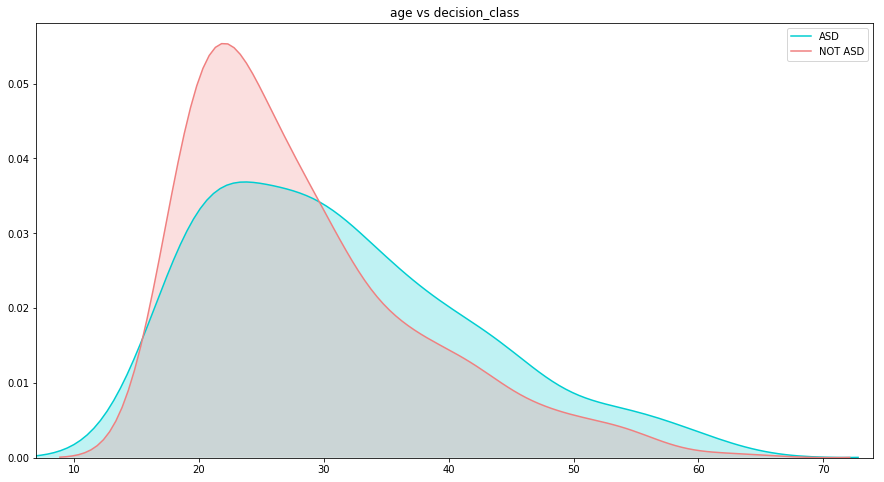

In [53]:
plt.figure(figsize=(15,8))

sns.kdeplot(
    data.age[data.decision_class == 1], 
    color="darkturquoise", 
    shade=True
)

sns.kdeplot(
    data.age[data.decision_class == 0], 
    color="lightcoral", 
    shade=True
)

plt.legend(['ASD', 'NOT ASD'])
plt.title('age vs decision_class')
plt.xlim(data.age.min() - 10, data.age.max() + 10)
plt.show()

In [54]:
data.decision_class.value_counts()

0    515
1    189
Name: decision_class, dtype: int64

In [55]:
data.gender[data.decision_class == 1].value_counts()

0    103
1     86
Name: gender, dtype: int64

In [56]:
data.gender[data.decision_class == 0].value_counts()

1    281
0    234
Name: gender, dtype: int64

In [57]:
data.isnull().sum()

a1_score           0
a2_score           0
a3_score           0
a4_score           0
a5_score           0
a6_score           0
a7_score           0
a8_score           0
a9_score           0
a10_score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
relation           0
decision_class     0
dtype: int64

## MISSING VALUES IMPUTATION

In [58]:
to_update_nans_dict = {}

columns = [
    'age'
]

for _decision_class in [0, 1]:
    for column in columns:
        vals = data[data.decision_class == _decision_class][column].value_counts()
        
        to_update_nans_dict['{decision_class}_{column}'.format(
            decision_class=_decision_class,
            column=column
        )] = vals.idxmax()

In [59]:
to_update_nans_dict

{'0_age': 21.0, '1_age': 30.0}

In [60]:
data.iloc[62, data.columns.get_loc('age')] = to_update_nans_dict.get('0_age')

In [61]:
data.iloc[91, data.columns.get_loc('age')] = to_update_nans_dict.get('1_age')

## HEATMAP

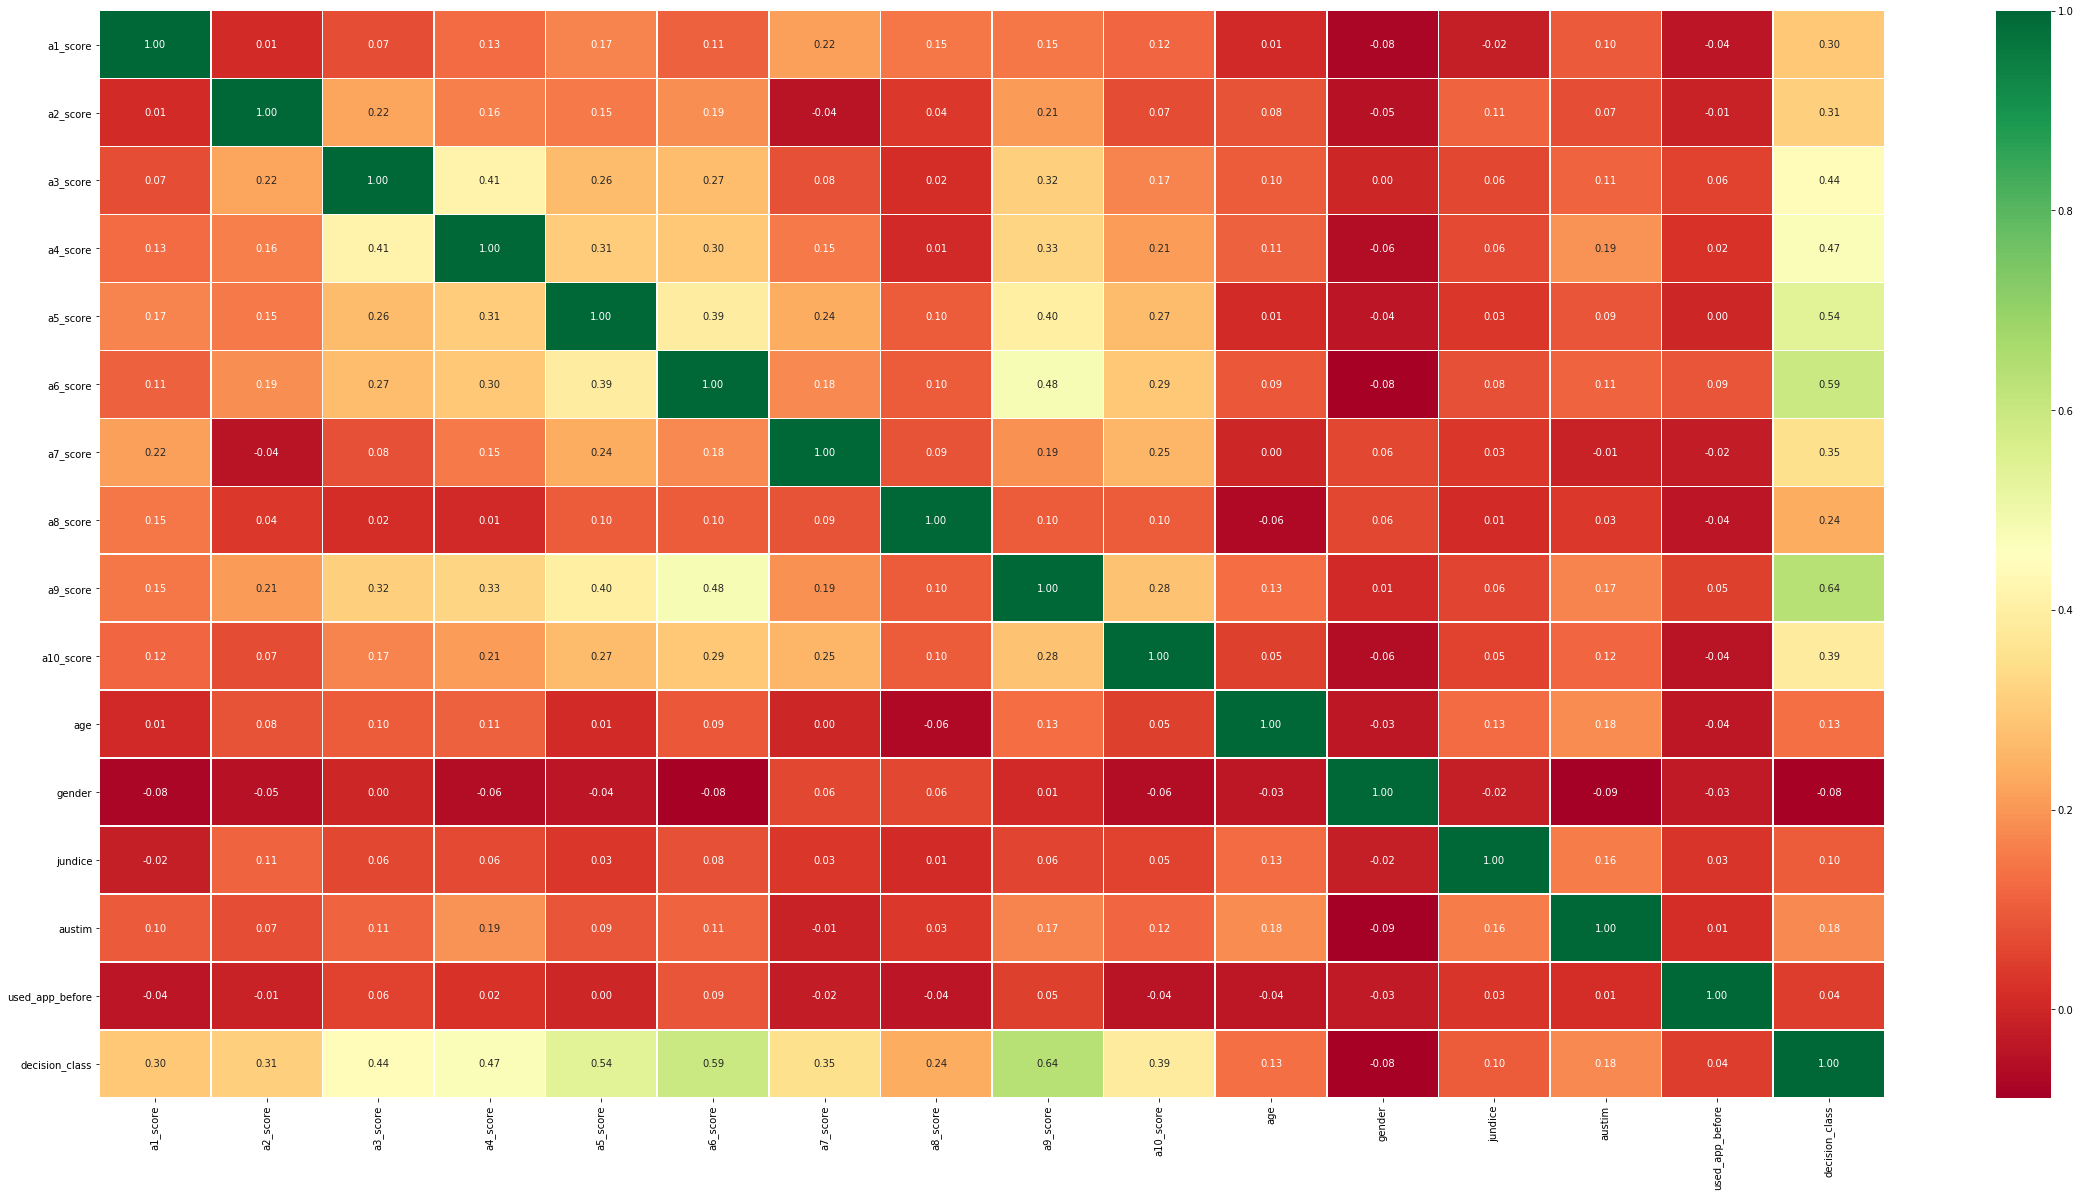

In [62]:
corr = data.corr()

sns.heatmap(
    data=corr,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    cmap='RdYlGn',
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)

fig = plt.gcf()
fig.set_size_inches(40, 20)

plt.show()

## PREPARING DATA FOR MODEL

In [63]:
feature_names = list(
    set(data.columns[0:-1].tolist()).difference(['contry_of_res', 'relation', 'ethnicity'])
)

X = data[feature_names].as_matrix()

X_new = np.hstack((
    X, 
    binarized_contry_of_res_matrix_data,
    binarized_ethnicity_matrix_data,
    binarized_result_matrix_data,
))
                   
y = data.decision_class

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [64]:
X_new.shape, y.shape

((704, 99), (704,))

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X_new,
    y,
    random_state=42,
    test_size=0.3
)

In [66]:
log_reg = LogisticRegression(
    C=1,
    penalty='l1',
    solver='liblinear',
    random_state=42,
    multi_class='ovr'

)

In [67]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l1', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [68]:
log_reg_predict = log_reg.predict(X_test)

In [69]:
log_reg.score(X_test, y_test)

1.0

In [70]:
preds = log_reg.predict(X_test)

In [71]:
log_reg_predict_proba = log_reg.predict_proba(X_test)[:, 1]

In [72]:
print('\nLogistic Regression Accuracy: {:.2f}%'.format(accuracy_score(y_test, log_reg_predict) * 100))
print('Logistic Regression AUC: {:.2f}%'.format(roc_auc_score(y_test, log_reg_predict) * 100))
print('Logistic Regression Classification report:\n\n', classification_report(y_test, log_reg_predict))


Logistic Regression Accuracy: 100.00%
Logistic Regression AUC: 100.00%
Logistic Regression Classification report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00        57

   micro avg       1.00      1.00      1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



In [73]:
print(confusion_matrix(y_test, preds))

[[155   0]
 [  0  57]]


## ROC

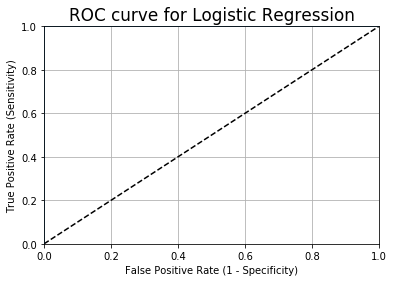

In [74]:
fpr, tpr, thresholds = roc_curve(
    y_test, 
    log_reg_predict_proba
)

plt.plot(
    [0, 1], 
    [0, 1], 
    'k--'
)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['font.size'] = 14

plt.title('ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.grid(True)

## F1 SCORE AFTER 10-FOLD CROSS-VALIDATION

In [75]:
kfold = StratifiedKFold(
    n_splits=10, 
    shuffle=True, 
    random_state=42
)

predicted = cross_val_predict(
    log_reg, 
    X_new, 
    y, 
    cv=kfold
)

scores = cross_val_score(
    log_reg, 
    X_new, 
    y, 
    cv=kfold,
    scoring='f1'
)

print('Cross-validated scores: {}\n'.format(scores))

print(classification_report(y, predicted))

print("\nLogisticRegression: F1 after 10-fold cross-validation: {:.2f}% (+/- {:.2f}%)".format(
    scores.mean() * 100,
    scores.std() * 2
))

Cross-validated scores: [0.97297297 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       515
           1       1.00      0.99      1.00       189

   micro avg       1.00      1.00      1.00       704
   macro avg       1.00      1.00      1.00       704
weighted avg       1.00      1.00      1.00       704


LogisticRegression: F1 after 10-fold cross-validation: 99.73% (+/- 0.02%)


## Cross-validation minimizes classification error estimation bias and is thus primarily used for small sample datasets.

## As expected, the classification f1 score dropped from ∼100% for the full dataset to ∼99.75% with 10-fold or percentage-split cross-validation.